In [1]:
import numpy as np
import pandas as pd

In [21]:
import yfinance as yf

In [22]:
Df = yf.download('GLD', '2005-01-01', '2022-11-14', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [23]:
Df.describe()

,Open,High,Low,Close,Volume
count,4498.000000,4498.000000,4498.000000,4498.000000,4.498000e+03
mean,119.287341,119.878811,118.647219,119.283991,9.721463e+06
std,37.173601,37.298046,37.021179,37.167781,6.947977e+06
min,41.029999,41.360001,41.020000,41.259998,3.193000e+05
25%,93.842497,94.302500,93.069998,93.709999,5.356500e+06
50%,121.024998,121.505001,120.580002,120.975002,8.079500e+06
75%,150.310005,151.120003,149.552502,150.327496,1.197290e+07
max,193.740005,194.449997,192.520004,193.889999,9.380420e+07


In [24]:
# Using only closing price ...
Df = Df[['Close']]

In [25]:
Df = Df.dropna()

In [26]:
Df.head(10)

,Close
Date,
2005-01-03,43.020000
2005-01-04,42.740002
2005-01-05,42.669998
2005-01-06,42.150002
2005-01-07,41.840000
2005-01-10,41.950001
2005-01-11,42.209999
2005-01-12,42.599998
2005-01-13,42.599998


In [27]:
import matplotlib.pyplot as plt

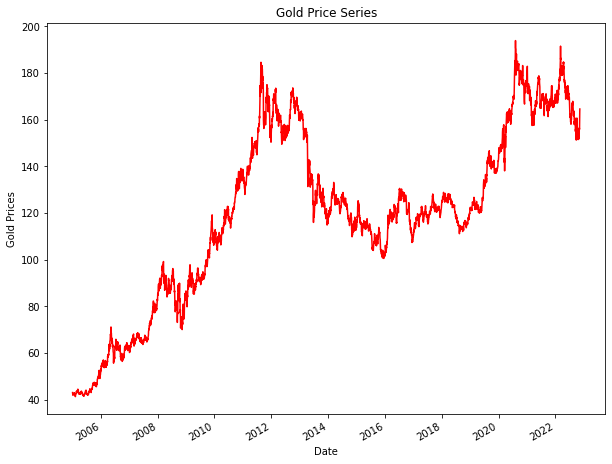

In [28]:
Df.Close.plot(figsize=(10, 8),color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price Series")
plt.show()

In [29]:
# Extracting required values of moving averages
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['S_27'] = Df['Close'].rolling(window=27).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9','S_27']]

# Define dependent variable
y = Df['next_day_price']

In [30]:
# train test split
t = 0.8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predictions
predicted_price = lr.predict(X_test)

In [35]:
predicted_price

array([120.91739842, 121.08323526, 121.31699489, 120.91051818,
       120.55133896, 120.31207377, 120.45512675, 120.95234658,
       121.04704127, 121.21153651, 121.28280631, 121.96115669,
       122.4160074 , 122.73621838, 122.23334159, 121.49258478,
       120.78820911, 120.33107969, 120.18962932, 120.41407483,
       120.84184928, 121.13365094, 121.05726314, 121.21363797,
       122.16226935, 123.77223089, 125.05274303, 125.77822823,
       125.9592518 , 126.3979092 , 126.21209388, 125.80293064,
       125.37421332, 125.80469788, 126.33450645, 126.56904321,
       126.74116216, 127.23522817, 129.00914425, 130.81469212,
       133.04737271, 134.08023114, 134.31210007, 133.68983942,
       133.09624536, 132.04277788, 132.12801067, 132.24646314,
       132.88135519, 132.10768374, 131.42582427, 132.10809128,
       132.70145368, 133.43346385, 133.23463311, 133.15174544,
       133.56526792, 134.66000243, 135.42627852, 135.30428713,
       134.17539128, 134.09556234, 133.6869378 , 133.67

In [36]:
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])

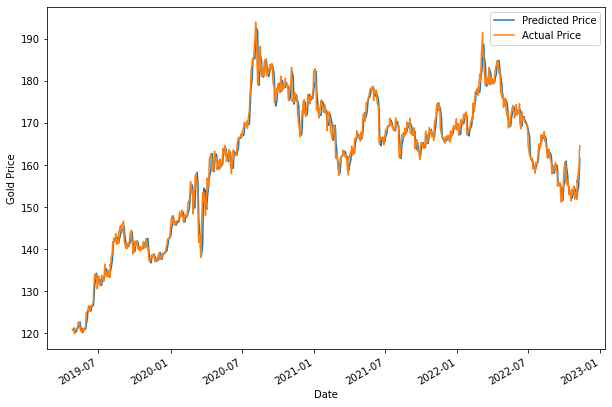

In [37]:
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Gold Price")
plt.show()

In [38]:
r2_score = lr.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.28

In [43]:
# Present Day prediction and signal
import datetime as dt
current_date = dt.datetime.now()

data = yf.download('GLD', '2008-06-01', current_date, auto_adjust=True)

data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data['S_27'] = data['Close'].rolling(window=27).mean()

data = data.dropna()

# Forecast the price
data['predicted_gold_price'] = lr.predict(data[['S_3', 'S_9','S_27']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")

# Print the forecast
data.tail(1)[['signal','predicted_gold_price']].T

[*********************100%***********************]  1 of 1 completed


C:\Users\maste\AppData\Local\Temp\ipykernel_3384\2861354777.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_gold_price'] = lr.predict(data[['S_3', 'S_9','S_27']])
C:\Users\maste\AppData\Local\Temp\ipykernel_3384\2861354777.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")


Date,2022-11-17
signal,No Position
predicted_gold_price,165.114849


In [41]:
yf.Ticker('GLD').info

{'exchange': 'PCX',
 'shortName': 'SPDR Gold Trust',
 'longName': 'SPDR\xa0Gold Shares',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-18000000',
 'quoteType': 'ETF',
 'symbol': 'GLD',
 'messageBoardId': 'finmb_5600649',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': 0.1,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 1100736000,
 'annualReportExpenseRatio': None,
 'totalAssets': 48492728320,
 'bookValue': None,
 'fundFamily': 'SPDR State Street Global Advisors',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0,
 'mostRecentQuarter': None,
 'enterpriseValue': None,
